## Note: Select the env WorldModels above

In [2]:
# To select a specific GPU:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [3]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf_config = tf.compat.v1.ConfigProto()
tf_config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=tf_config)
import tensorflow.compat.v1.keras.backend as K
K.set_session(sess)

In [5]:
import os
import sys


#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
#Importing the VAE
from VAE.world_model_vae import VAE

/itf-fi-ml/home/kaiolae/test_project/WorldModels


In [26]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 1.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    #fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    fig = plt.figure(figsize=(128,128), dpi=0.5)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(1-image_array[i]) #NOTE: The 1- is a trick to invert img colors
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [7]:
#Loading Weights of trained VAE
vae = VAE()
vae.set_weights("../trained_models_folder_ski/final_full_vae_weights.h5")
#vae.set_weights("../vae_from_large_dataset_copy/final_full_vae_weights.h5")

VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   416         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 32)   4128        conv2d_1[0][0]                   
__________

In [8]:
#Getting some data to feed into the VAE
import numpy as np
#data = np.load("/scratch/users/kaiolae/training_data_folder/obs_data_doomrnn_0.npy",allow_pickle=True)
data = np.load("/scratch/users/kaiolae/training_data_folder_skiing/obs_data_Skiing-v0_0.npy",allow_pickle=True)

(100,)


[]

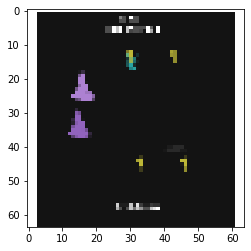

In [12]:
#Data: Dimensions are (rollout, timestep, x-axis, y-axis, colors)
import matplotlib.pyplot as plt
print(data.shape)

selected_rollout = np.array(data[2])
selected_rollout = selected_rollout.astype('float32') / 255.
#print(selected_rollout.shape)

some_picture = selected_rollout[200]
some_picture.shape
plt.imshow(some_picture)
plt.plot()

In [27]:
#Plotting a Real rollout
plot_movie_mp4(selected_rollout)

<Figure size 64x64 with 0 Axes>

In [28]:
latent_values_for_rollout = vae.encoder.predict(np.array(selected_rollout))
latent_values_for_rollout.shape
#Cool! We can prove that we're actually compressing things here simply by looking at the shape 

/storage/software/TensorFlow/2.4.1-fosscuda-2020b/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(2100, 64)

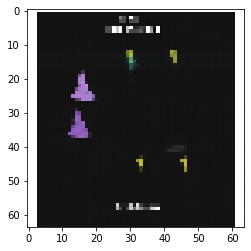

In [29]:
regenerated_images = vae.decoder.predict(latent_values_for_rollout)
plt.imshow(regenerated_images[200])

In [30]:
plot_movie_mp4(regenerated_images)

<Figure size 64x64 with 0 Axes>

In [ ]:
episode_done = False
obs_counter = 0
obs_skip = 100
while not episode_done:
    regen_img = regenerated_images[obs_counter]
    orig_img = selected_rollout[obs_counter]
    obs_counter+=obs_skip
    if obs_counter > len(regenerated_images):
        episode_done=True
    inverted_regen = 1-oneimg
    inverted_orig = 1-orig_img
    
    print("Original img")
    plt.imshow(inverted_orig)
    plt.show()
    
    print("Regen img")
    plt.imshow(inverted_regen)
    plt.show()

In [ ]:
plot_movie_mp4(selected_rollout)
plot_movie_mp4(regenerated_images)